### 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

### 데이터 불러오기

In [2]:
data = pd.read_csv("../Module03_머신러닝/membership.csv")
print(data.shape)
data.head()

(8807, 15)


,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN


In [3]:
data.columns = ['id', 'term', 'fee', 'married', 'gender', 'income', 'job',
'package', 'age', 'family', 'payment', 'agent', 'target', 'start_date', 'end_date']

### 결측값 제거

In [4]:
# end_date 열 삭제
data = data.drop(['end_date'], axis=1)

In [5]:
# 결측치가 있는 행 제거
data.dropna(how='any')

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313
6,6,17,103016.16,S,M,999996.0,2.0,TYPE-A,35,0,MONTHLY,348099,0,20130930
9,9,12,300002.40,M,M,349992.0,1.0,TYPE-B,46,2,MONTHLY,1360477,1,20121130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,8801,12,100000.00,M,M,300000.0,2.0,TYPE-B,37,2,ANNUAL,1296622,1,20120806
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127


### 평균값 대체

In [6]:
# 결측치를 직업별 평균값으로 대체
data['income'] = data['income'].fillna(data.groupby('job')['income'].transform('mean'))
data['income'].isnull().sum() # 직업 결측치가 있기 때문에 결측치 16개 발생

16

In [7]:
# 결측치를 평균값으로 대체
data['income'] = data['income'].fillna(data['income'].mean()) # 따라서 전체 평균값으로 대체
data['income'].isnull().sum()

0

In [8]:
data['income_log'] = np.log1p(data['income'])
data.head()
# start_date : 날짜로 인식할수 있게 to_datetime 으로 변환하거나 가입 후 지난 날짜를 계산한 변수로 변경

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date,income_log
0,0,22,100000.00,M,M,450000.000000,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,13.017005
1,1,88,149029.58,NaN,M,544756.571429,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,13.208096
2,2,93,102999.94,NaN,M,600000.000000,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,13.304687
3,3,17,147576.48,M,F,450000.000000,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,13.017005
4,4,39,100000.00,M,M,600000.000000,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,13.304687


### 최빈값 대체

In [9]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['married'] = data['married'].fillna(data['married'].mode()[0])

data.isnull().sum()

id             0
term           0
fee            0
married        0
gender         0
income         0
job           34
package        0
age            0
family         0
payment        0
agent          0
target         0
start_date     0
income_log     0
dtype: int64

In [10]:
data['isna_job'] = data['job'].isnull()
data['job'] = data['job'].fillna('etc')

# data = data.dropna(subset=['job'], how='any')
data.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           0
package       0
age           0
family        0
payment       0
agent         0
target        0
start_date    0
income_log    0
isna_job      0
dtype: int64

### Label Encoding

In [11]:
# 숫자형 변수
numeric_features = []
for col in data.columns:
    if data[col].dtype != 'object':
        numeric_features.append(col)
        
numeric_features        

['id',
 'term',
 'fee',
 'income',
 'age',
 'family',
 'target',
 'start_date',
 'income_log',
 'isna_job']

In [12]:
# 범주형 변수
categorical_features = []
for col in data.columns:
    if data[col].dtype == 'O':
        categorical_features.append(col)
        
categorical_features

['married', 'gender', 'job', 'package', 'payment', 'agent']

In [13]:
# 범주형 변수 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:

    data[col] = data[col].astype(str).astype('category')
    data[col] = le.fit_transform(data[col])

data.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,start_date,income_log,isna_job
0,0,22,100000.00,1,1,450000.000000,0,1,27,1,0,3055,0,20091029,13.017005,False
1,1,88,149029.58,1,1,544756.571429,5,0,75,0,0,1078,0,20131014,13.208096,False
2,2,93,102999.94,1,1,600000.000000,0,0,49,0,0,1460,0,20130531,13.304687,False
3,3,17,147576.48,1,0,450000.000000,0,0,47,3,1,2204,0,20130331,13.017005,False
4,4,39,100000.00,1,1,600000.000000,0,1,36,3,0,494,0,20080313,13.304687,False


### Feature 선택

In [14]:
selected_features = ['term', 'fee', 'married', 'gender', 'job', 'package',
       'age', 'family', 'payment', 'income_log', 'isna_job']

X = data.loc[:, selected_features].copy()
y = data.loc[:, 'target'].copy()

print(X.shape, y.shape)

(8807, 11) (8807,)


In [15]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

### Optuna 최적화

In [16]:
import optuna
import time

def objective(trial):
    # 더 다양한 하이퍼파라미터 탐색
    # 본 코드에서는 xgboost 모델을 활용해서 해당 모델의 최적의 파라미터를 설정한다.
    # 따라서 아래의 params 는 xgboost 의 파라미터들이며, 각 파라미터의 범위는 직접 설정해야 한다.
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1.0, 5.0)
    }

    # 교차 검증을 위한 지표들
    cv_scores = {
        'f1': [],
        'training_time': []
    }

    # xgboost 모델을 실행해서 위의 지표들을 통해 평가하고 최적의 파라미터를 찾는다.
    try:
        model = xgb.XGBClassifier(
            random_state=42,
            tree_method='hist',  # 더 빠른 학습을 위한 설정
            **params
        )

        skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

        for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y), 1):
            X_tr, X_val = X.iloc[train_idx], X.iloc[valid_idx]
            y_tr, y_val = y.iloc[train_idx], y.iloc[valid_idx]

            # 학습 시간 측정
            start_time = time.time()
            model.fit(X_tr, y_tr,
                    eval_set=[(X_val, y_val)], # evaluation set : 검증셋 설정
                    verbose=0)
            training_time = time.time() - start_time

            y_pred = model.predict(X_val)
            fold_f1 = f1_score(y_val, y_pred)
            
            cv_scores['f1'].append(fold_f1)
            cv_scores['training_time'].append(training_time)

            # 중간 결과 출력
            trial.report(fold_f1, fold)

            # 성능이 너무 안 좋으면 early stopping
            if trial.should_prune():
                raise optuna.TrialPruned()

        # 평균 성능 계산
        mean_f1 = np.mean(cv_scores['f1'])
        mean_time = np.mean(cv_scores['training_time'])

        # 결과 로깅
        print(f"\nTrial {trial.number}:")
        print(f"Mean F1 Score: {mean_f1:.4f}")
        print(f"Mean Training Time: {mean_time:.2f} seconds")
        print(f"Parameters: {params}")

        return mean_f1

    except Exception as e:
        print(f"Error in trial {trial.number}: {str(e)}")
        return float('-inf')

# Optuna study 설정
study = optuna.create_study(
    direction='maximize',   # f1 score 를 최대화하려는 설정
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5),
    study_name='xgboost_optimization'
)

# 최적화 실행
study.optimize(
    objective, 
    n_trials=10,   # 10회 실험 -> 실험 횟수 많이 할수록 더 좋아진다.
    timeout=3600,  # 1시간 제한
    catch=(Exception,)
)

# 최적화 결과 출력
print("\nBest trial:")
print(f"Value: {study.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")

[I 2025-01-28 16:16:59,669] A new study created in memory with name: xgboost_optimization
[I 2025-01-28 16:17:00,052] Trial 0 finished with value: 0.5211983612798796 and parameters: {'n_estimators': 79, 'max_depth': 2, 'learning_rate': 0.01928752977096398, 'subsample': 0.5793748289074372, 'colsample_bytree': 0.9437251142564883, 'reg_alpha': 0.0002985579568882888, 'reg_lambda': 0.9940033008905271, 'scale_pos_weight': 2.839981967807057}. Best is trial 0 with value: 0.5211983612798796.



Trial 0:
Mean F1 Score: 0.5212
Mean Training Time: 0.07 seconds
Parameters: {'n_estimators': 79, 'max_depth': 2, 'learning_rate': 0.01928752977096398, 'subsample': 0.5793748289074372, 'colsample_bytree': 0.9437251142564883, 'reg_alpha': 0.0002985579568882888, 'reg_lambda': 0.9940033008905271, 'scale_pos_weight': 2.839981967807057}


[I 2025-01-28 16:17:01,853] Trial 1 finished with value: 0.4930724971739101 and parameters: {'n_estimators': 371, 'max_depth': 4, 'learning_rate': 0.04619728846191235, 'subsample': 0.7854432251075598, 'colsample_bytree': 0.69789715729707, 'reg_alpha': 0.0001561761772706679, 'reg_lambda': 0.03264823586500685, 'scale_pos_weight': 1.7540169646062447}. Best is trial 0 with value: 0.5211983612798796.



Trial 1:
Mean F1 Score: 0.4931
Mean Training Time: 0.35 seconds
Parameters: {'n_estimators': 371, 'max_depth': 4, 'learning_rate': 0.04619728846191235, 'subsample': 0.7854432251075598, 'colsample_bytree': 0.69789715729707, 'reg_alpha': 0.0001561761772706679, 'reg_lambda': 0.03264823586500685, 'scale_pos_weight': 1.7540169646062447}


[I 2025-01-28 16:17:03,046] Trial 2 finished with value: 0.53445566039846 and parameters: {'n_estimators': 220, 'max_depth': 5, 'learning_rate': 0.030529823770469373, 'subsample': 0.6505053631988998, 'colsample_bytree': 0.6135509451319288, 'reg_alpha': 0.07892437750814096, 'reg_lambda': 0.0023290147662228815, 'scale_pos_weight': 2.5964629318005676}. Best is trial 2 with value: 0.53445566039846.



Trial 2:
Mean F1 Score: 0.5345
Mean Training Time: 0.23 seconds
Parameters: {'n_estimators': 220, 'max_depth': 5, 'learning_rate': 0.030529823770469373, 'subsample': 0.6505053631988998, 'colsample_bytree': 0.6135509451319288, 'reg_alpha': 0.07892437750814096, 'reg_lambda': 0.0023290147662228815, 'scale_pos_weight': 2.5964629318005676}


[I 2025-01-28 16:17:05,597] Trial 3 finished with value: 0.3809205402970356 and parameters: {'n_estimators': 448, 'max_depth': 5, 'learning_rate': 0.055621138595300865, 'subsample': 0.5013723794106733, 'colsample_bytree': 0.9208852264210817, 'reg_alpha': 0.007492413631194563, 'reg_lambda': 3.3929312192567186e-07, 'scale_pos_weight': 1.124209811777579}. Best is trial 2 with value: 0.53445566039846.



Trial 3:
Mean F1 Score: 0.3809
Mean Training Time: 0.50 seconds
Parameters: {'n_estimators': 448, 'max_depth': 5, 'learning_rate': 0.055621138595300865, 'subsample': 0.5013723794106733, 'colsample_bytree': 0.9208852264210817, 'reg_alpha': 0.007492413631194563, 'reg_lambda': 3.3929312192567186e-07, 'scale_pos_weight': 1.124209811777579}


[I 2025-01-28 16:17:06,168] Trial 4 finished with value: 0.3950626759140328 and parameters: {'n_estimators': 124, 'max_depth': 2, 'learning_rate': 0.014829566895219876, 'subsample': 0.922986059043114, 'colsample_bytree': 0.7594717147615152, 'reg_alpha': 0.003197119901369823, 'reg_lambda': 0.19630024203241325, 'scale_pos_weight': 1.7313251042126137}. Best is trial 2 with value: 0.53445566039846.



Trial 4:
Mean F1 Score: 0.3951
Mean Training Time: 0.11 seconds
Parameters: {'n_estimators': 124, 'max_depth': 2, 'learning_rate': 0.014829566895219876, 'subsample': 0.922986059043114, 'colsample_bytree': 0.7594717147615152, 'reg_alpha': 0.003197119901369823, 'reg_lambda': 0.19630024203241325, 'scale_pos_weight': 1.7313251042126137}


[I 2025-01-28 16:17:08,203] Trial 5 finished with value: 0.5332233508615747 and parameters: {'n_estimators': 434, 'max_depth': 3, 'learning_rate': 0.027959906341514348, 'subsample': 0.6468213367635229, 'colsample_bytree': 0.8612054456456333, 'reg_alpha': 0.00824336376571507, 'reg_lambda': 0.005115346631413965, 'scale_pos_weight': 2.385255112701392}. Best is trial 2 with value: 0.53445566039846.



Trial 5:
Mean F1 Score: 0.5332
Mean Training Time: 0.40 seconds
Parameters: {'n_estimators': 434, 'max_depth': 3, 'learning_rate': 0.027959906341514348, 'subsample': 0.6468213367635229, 'colsample_bytree': 0.8612054456456333, 'reg_alpha': 0.00824336376571507, 'reg_lambda': 0.005115346631413965, 'scale_pos_weight': 2.385255112701392}


[I 2025-01-28 16:17:08,791] Trial 6 finished with value: 0.5237098919990597 and parameters: {'n_estimators': 108, 'max_depth': 3, 'learning_rate': 0.019437282357561123, 'subsample': 0.848840256949724, 'colsample_bytree': 0.7202683288567859, 'reg_alpha': 0.019390813678552502, 'reg_lambda': 0.8976654780560833, 'scale_pos_weight': 3.681484633038485}. Best is trial 2 with value: 0.53445566039846.



Trial 6:
Mean F1 Score: 0.5237
Mean Training Time: 0.11 seconds
Parameters: {'n_estimators': 108, 'max_depth': 3, 'learning_rate': 0.019437282357561123, 'subsample': 0.848840256949724, 'colsample_bytree': 0.7202683288567859, 'reg_alpha': 0.019390813678552502, 'reg_lambda': 0.8976654780560833, 'scale_pos_weight': 3.681484633038485}


[I 2025-01-28 16:17:09,163] Trial 7 finished with value: -inf and parameters: {'n_estimators': 183, 'max_depth': 2, 'learning_rate': 0.010282514154604147, 'subsample': 0.9587384639565357, 'colsample_bytree': 0.5136722169906678, 'reg_alpha': 0.0006160555443820768, 'reg_lambda': 3.1692512487946106e-06, 'scale_pos_weight': 3.526470862746957}. Best is trial 2 with value: 0.53445566039846.


Error in trial 7: 


[I 2025-01-28 16:17:09,495] Trial 8 finished with value: 0.5372930651571205 and parameters: {'n_estimators': 54, 'max_depth': 3, 'learning_rate': 0.08140043819062062, 'subsample': 0.7410099777128472, 'colsample_bytree': 0.9248473274569027, 'reg_alpha': 2.453445896986848e-05, 'reg_lambda': 0.06897274168855157, 'scale_pos_weight': 2.680702478566129}. Best is trial 8 with value: 0.5372930651571205.



Trial 8:
Mean F1 Score: 0.5373
Mean Training Time: 0.06 seconds
Parameters: {'n_estimators': 54, 'max_depth': 3, 'learning_rate': 0.08140043819062062, 'subsample': 0.7410099777128472, 'colsample_bytree': 0.9248473274569027, 'reg_alpha': 2.453445896986848e-05, 'reg_lambda': 0.06897274168855157, 'scale_pos_weight': 2.680702478566129}


[I 2025-01-28 16:17:09,902] Trial 9 finished with value: 0.5282194964267354 and parameters: {'n_estimators': 61, 'max_depth': 4, 'learning_rate': 0.01665855602955541, 'subsample': 0.8990802746540305, 'colsample_bytree': 0.5915824586333233, 'reg_alpha': 0.10620188888087047, 'reg_lambda': 4.3357824304901857e-07, 'scale_pos_weight': 3.105874872144122}. Best is trial 8 with value: 0.5372930651571205.



Trial 9:
Mean F1 Score: 0.5282
Mean Training Time: 0.08 seconds
Parameters: {'n_estimators': 61, 'max_depth': 4, 'learning_rate': 0.01665855602955541, 'subsample': 0.8990802746540305, 'colsample_bytree': 0.5915824586333233, 'reg_alpha': 0.10620188888087047, 'reg_lambda': 4.3357824304901857e-07, 'scale_pos_weight': 3.105874872144122}

Best trial:
Value: 0.5373
Best hyperparameters:
    n_estimators: 54
    max_depth: 3
    learning_rate: 0.08140043819062062
    subsample: 0.7410099777128472
    colsample_bytree: 0.9248473274569027
    reg_alpha: 2.453445896986848e-05
    reg_lambda: 0.06897274168855157
    scale_pos_weight: 2.680702478566129


In [17]:
# 결과 시각화
optuna.visualization.plot_optimization_history(study)

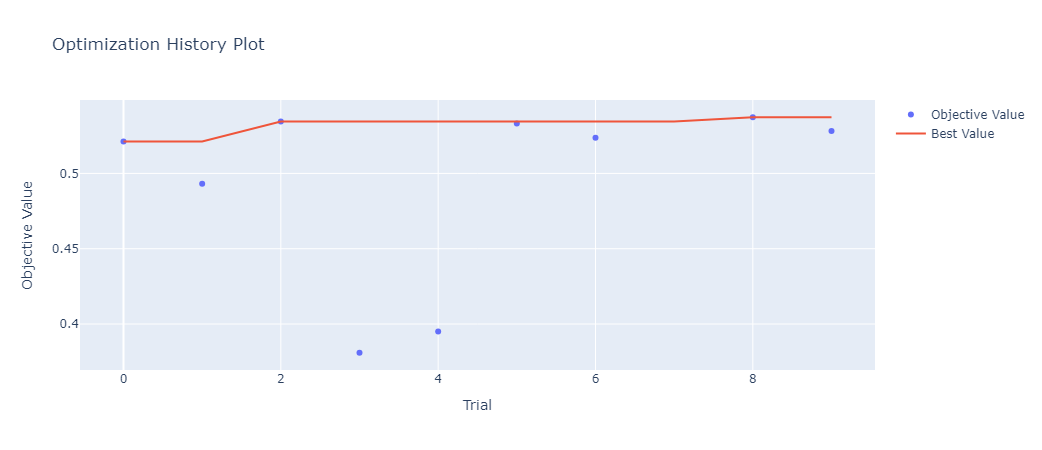

In [18]:
optuna.visualization.plot_param_importances(study)

[W 2025-01-28 16:17:10,244] Trial 7 is omitted in visualization because its objective value is inf or nan.


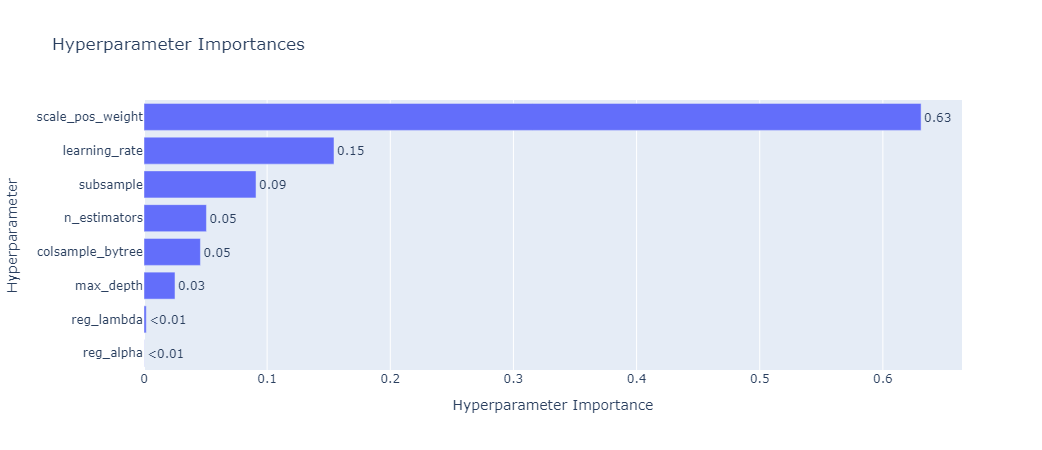

In [19]:
# 최적화된 하이퍼파라미터 출력
best_params = study.best_params
best_params

{'n_estimators': 54,
 'max_depth': 3,
 'learning_rate': 0.08140043819062062,
 'subsample': 0.7410099777128472,
 'colsample_bytree': 0.9248473274569027,
 'reg_alpha': 2.453445896986848e-05,
 'reg_lambda': 0.06897274168855157,
 'scale_pos_weight': 2.680702478566129}

In [ ]:
# 최적화된 하이퍼파라미터로 모델 학습 (scikit-learn 1.5.2 설치)
best_model = xgb.XGBClassifier(
    random_state=42,
    **best_params
)

best_model.fit(X, y)

In [21]:
# 최종 모델 저장
import joblib

joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [22]:
# 최종 모델 불러오기
loaded_model = joblib.load('model.pkl')

# 예측
loaded_model.predict(X)

# 예측 확률
loaded_model.predict_proba(X)

# 예측 확률 중 Positive 클래스에 대한 예측 확률
loaded_model.predict_proba(X)[:, 1]

array([0.59783375, 0.35669652, 0.4146889 , ..., 0.29693308, 0.5977525 ,
       0.61330205], dtype=float32)